In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from tensorboard.backend.event_processing import event_accumulator

In [2]:
# 10 second bins
bin_size = 10

In [3]:
params = {
    'legend.fontsize': 'large',
    'figure.figsize': (8, 4), # 2.2*len(csvs)
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large',
    'xtick.major.size': 7.0,
    'ytick.major.size': 3.0
}
pylab.rcParams.update(params)

In [4]:
def plot_dirs(dirs, savepath=''):

    plt.figure()

    for sketch_name, color, directory in dirs:
        time_loss_dict = [[] for i in range(300)]

        for file in os.listdir(directory):
            path = os.path.join(directory, file)
            ea = event_accumulator.EventAccumulator(path,
                size_guidance={ # see below regarding this argument
                event_accumulator.COMPRESSED_HISTOGRAMS: 500,
                event_accumulator.IMAGES: 4,
                event_accumulator.AUDIO: 4,
                event_accumulator.SCALARS: 0,
                event_accumulator.HISTOGRAMS: 1,
            })

            ea.Reload()

            times = pd.DataFrame(ea.Scalars('training_time'))['value'] // bin_size
            losses = pd.DataFrame(ea.Scalars('test_error'))['value']

            for i in range(len(times)):
    #             print(int(times[i]), losses[i])
                time_loss_dict[int(times[i])].append(losses[i])

    #     print(time_loss_dict)
    #     break

        times = []
        means = []
        stds = []
        for i, entry in enumerate(time_loss_dict):
            if len(entry) > 0:
    #             print(i, len(entry))
                times.append(i*bin_size)
                means.append(np.array(entry).mean())
                stds.append(np.array(entry).std())


    #     print(times)
    #     print(means)
        plt.fill_between(times, np.array(means)-np.array(stds), np.array(means)+np.array(stds), alpha=0.2, color=color)
        plt.plot(times, np.array(means), label=sketch_name, color=color, linewidth=3)
        print(sketch_name, times, np.array(means))

    plt.legend()
    plt.ylim(0,0.1)
    #plt.xlim(0,300)
    plt.xlabel('Training Time [seconds]')
    plt.ylabel('Test Error')
    plt.tight_layout()
    
    if len(savepath) > 0:
        plt.savefig(savepath, dpi=300)
    # plt.xscale('log')
#     plt.yscale('log')
    plt.show()

In [5]:
colors = plt.get_cmap('tab20c')(np.linspace(0, 0.8, 16))[::2]
colors = np.flip(colors, axis=0)

In [7]:
folder = '../tensorboard_logs/'

## New

TensorSketch [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680] [0.35056666 0.0446     0.0356     0.03105    0.02755    0.0258
 0.02583333 0.02545    0.0255     0.02515    0.0248     0.02535
 0.02496667 0.025      0.0251     0.0253     0.0252     0.02535
 0.02533333 0.0253     0.0253     0.02535    0.02525    0.0253
 0.0253     0.025      0.0254     0.0252     0.02575    0.0279
 0.02546667 0.02555    0.02545    0.02555    0.02575    0.0257
 0.02575    0.02573333 0.0258     0.02555    0.0254     0.0252
 0.025      0.0248     0.0255     0.02545    0.02525    0.0255
 0.0319     0.02686667 0.02585    0.02585    0.0255     0.0256
 0.02545    0.02555    0.02536667 0.02535    0.0255     0.02575
 0.02555    0.02555

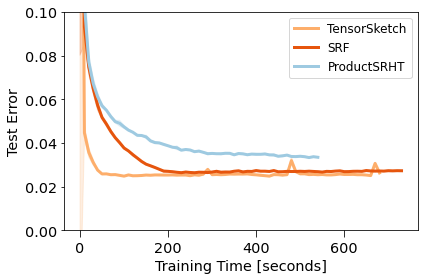

In [10]:
# with ARD

dirs_p7_tune = [
    ('TensorSketch', colors[4], folder+'sgp_MNIST_proj_countsketch_scatter_deg_7_compreal_False_craft_False_ard_True_norm_nocache_t4_lr_0.001_epochs_150'),
    ('SRF', colors[5], folder+'sgp_MNIST_proj_srf_deg_7_compreal_False_craft_False_ard_True_norm_nocache_t4_lr_0.001_epochs_450'),
    ('ProductSRHT', colors[6], folder+'sgp_MNIST_proj_srht_deg_7_compreal_False_craft_False_ard_True_norm_nocache_t4_lr_0.001_epochs_150'),
#     ('CtR-ProductSRHT', colors[7], folder+'sgp_MNIST_srht_deg_7_compreal_True_craft_False_ard_True_norm_nocache_t4_lr_0.001_epochs_150')
]

plot_dirs(dirs_p7_tune, savepath='')

## Old

TensorSketch [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570] [0.41579047 0.09816429 0.0654475  0.05248718 0.04583871 0.04106667
 0.03664762 0.0332525  0.03097419 0.0291641  0.02774048 0.02656098
 0.02571    0.02512439 0.0245075  0.02406341 0.02368788 0.02353846
 0.02339    0.0232125  0.02316842 0.02266765 0.0228439  0.02280513
 0.02285789 0.02250541 0.02283158 0.02267561 0.02278158 0.02247143
 0.022735   0.0226359  0.0226675  0.02251765 0.0226375  0.02267105
 0.0226878  0.02249714 0.02263077 0.02261026 0.02271026 0.02278421
 0.0225973  0.02276579 0.02273415 0.02265143 0.02254359 0.02276
 0.02273158 0.02264324 0.02259167 0.02263333 0.02263947 0.02251842
 0.02218182 0.02222    0.02198333 0.02196667]
SRF [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 13

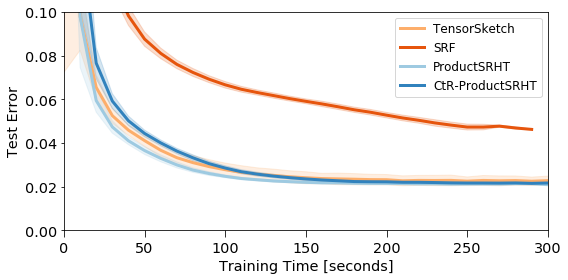

In [73]:
dirs_p3_10k_tune = [
    ('TensorSketch', colors[4], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_countsketch_scatter_deg_3_comprealFalse_2_lr_0.001_epochs_150'),
    ('SRF', colors[5], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srf_deg_3_comprealFalse_2_lr_0.001_epochs_150'),
    ('ProductSRHT', colors[6], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_3_comprealFalse_2_lr_0.001_epochs_150'),
    ('CtR-ProductSRHT', colors[7], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_3_comprealTrue_2_lr_0.001_epochs_150')
]

plot_dirs(dirs_p3_10k_tune, savepath='')

TensorSketch [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860] [0.504858   0.069116   0.053178   0.04711379 0.04291304 0.039704
 0.036888   0.035332   0.033932   0.032486   0.03110638 0.030875
 0.02982    0.029128   0.02833864 0.02825161 0.027772   0.027325
 0.02725122 0.02659722 0.026488   0.02629583 0.02582821 0.02638158
 0.02583878 0.02567917 0.02548333 0.02561429 0.02537292 0.02543192
 0.02533429 0.02546591 0.02521429 0.02530638 0.02531471 0.02536444
 0.02520612 0.0252814  0.0253     0.02533182 0.0253551  0.02534651
 0.02542973 0.02546522 0.02547083 0.02527381 0.02580541 0.02555625
 0.0255234  0.02539459 0.0257255

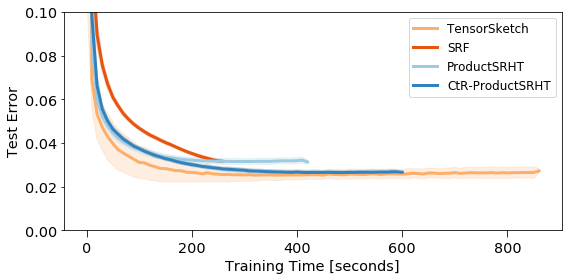

In [89]:
# pytorch 1.12 cuda 1.2, nvidia t4, caching
dirs_p6_10k_tune = [
    ('TensorSketch', colors[4], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_countsketch_scatter_deg_6_comprealFalse_2_lr_0.001_epochs_150'),
    ('SRF', colors[5], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srf_deg_6_comprealFalse_2_lr_0.001_epochs_150'),
    ('ProductSRHT', colors[6], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_6_comprealFalse_2_lr_0.001_epochs_150'),
    ('CtR-ProductSRHT', colors[7], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_6_comprealTrue_2_lr_0.001_epochs_150')
]

plot_dirs(dirs_p6_10k_tune, savepath='')

TensorSketch [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820] [0.3682     0.06831667 0.05536667 0.0484     0.04431111 0.0411
 0.03895    0.03747778 0.0359     0.03482222 0.03378333 0.0317
 0.03195    0.03073333 0.02965556 0.02918333 0.028      0.02921429
 0.028      0.028525   0.02761667 0.026975   0.02794286 0.0268125
 0.02717143 0.02658571 0.02641429 0.027      0.0259875  0.02684286
 0.02608571 0.02605714 0.0263625  0.02601429 0.02668571 0.02578571
 0.02597143 0.02615    0.02591429 0.0263     0.02626667 0.02591429
 0.026425   0.02594286 0.0263625  0.0259     0.02577143 0.02657143
 0.0258     0.026425   0.02568571 0.02598571 0.0260375 

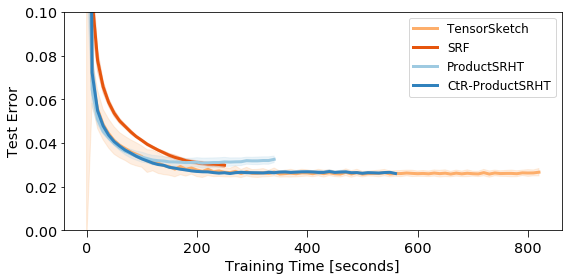

In [88]:
# T4 with caching, cuda 10.2, pytorch 1.1, we need p100?
dirs_p6_10k_tune = [
    ('TensorSketch', colors[4], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_countsketch_scatter_deg_6_comprealFalse_3_lr_0.001_epochs_200'),
    ('SRF', colors[5], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srf_deg_6_comprealFalse_3_lr_0.001_epochs_200'),
    ('ProductSRHT', colors[6], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_6_comprealFalse_3_lr_0.001_epochs_200'),
    ('CtR-ProductSRHT', colors[7], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_6_comprealTrue_3_lr_0.001_epochs_200')
]

plot_dirs(dirs_p6_10k_tune, savepath='')

TensorSketch [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160] [0.51204375 0.08279375 0.0652375  0.0582125  0.05383125 0.0499
 0.04649375 0.0445625  0.042975   0.04116875 0.03976429 0.0389
 0.0380375  0.03684375 0.03756667 0.0339     0.034475   0.03387143
 0.03265385 0.03353846 0.032325   0.03218571 0.03146364 0.03106667
 0.03110714 0.03154286 0.02956154 0.03014    0.03012857 0.03033571
 0.02835    0.02983333 0.0291     0.02960714 0.02790833 0.02898571
 

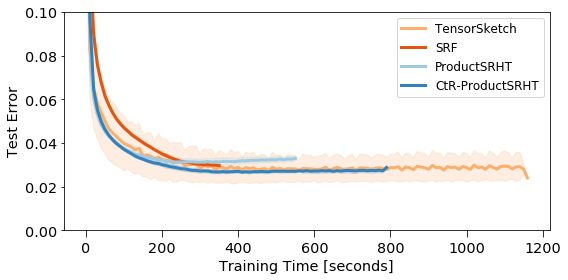

In [91]:
# T4 without caching, cuda 10.2, pytorch 1.1, we need p100?
dirs_p6_10k_tune = [
    ('TensorSketch', colors[4], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_countsketch_scatter_deg_6_comprealFalse_nocache_lr_0.001_epochs_200'),
    ('SRF', colors[5], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srf_deg_6_comprealFalse_nocache_lr_0.001_epochs_200'),
    ('ProductSRHT', colors[6], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_6_comprealFalse_nocache_lr_0.001_epochs_200'),
    ('CtR-ProductSRHT', colors[7], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_6_comprealTrue_nocache_lr_0.001_epochs_200')
]

plot_dirs(dirs_p6_10k_tune, savepath='')

TensorSketch [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520] [0.2408264  0.0450072  0.0367128  0.03282016 0.03064098 0.02898655
 0.02762155 0.02721538 0.02691667 0.02647931 0.02625299 0.02618718
 0.02606387 0.02623621 0.02622881 0.02629658 0.02655847 0.02665789
 0.02667565 0.02671966 0.02682735 0.02705254 0.02700678 0.02700336
 0.02690776 0.0271735  0.02726549 0.02734153 0.02742155 0.02733613
 0.02731966 0.02725345 0.02736667 0.02740254 0.02742373 0.02756068
 0.02751724 0.02751261 0.02761102 0.02752105 0.02755983 0.02763509
 0.02792288 0.02778136 0.02774224 0.0276322  0.02781368 0.02766271
 0.02791795 0.02783707 0.02771875 0.02864545 0.0301    ]
SRF [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250] [0.30818111 0.0

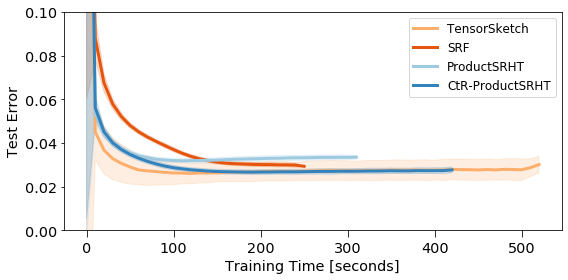

In [95]:
# P100 with caching, cuda 10.2, pytorch 1.1
dirs_p6_10k_tune = [
    ('TensorSketch', colors[4], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_countsketch_scatter_deg_6_comprealFalse_p100_cache_lr_0.001_epochs_250'),
    ('SRF', colors[5], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srf_deg_6_comprealFalse_p100_cache_lr_0.001_epochs_250'),
    ('ProductSRHT', colors[6], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_6_comprealFalse_p100_cache_lr_0.001_epochs_250'),
    ('CtR-ProductSRHT', colors[7], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_6_comprealTrue_p100_cache_lr_0.001_epochs_250')
]

plot_dirs(dirs_p6_10k_tune, savepath='')

TensorSketch [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140] [0.36010909 0.05384091 0.04183636 0.03490455 0.0305875  0.0265871
 0.02445455 0.02332727 0.02281739 0.02234348 0.021852   0.02179643
 0.02158182 0.021575   0.02147727 0.02136818 0.02122581 0.02129091
 0.02129583 0.02131818 0.02129545 0.02111071 0.02154    0.02142083
 0.0214     0.02145909 0.02135417 0.02154194 0.02135455 0.02148182
 0.02189091 0.02277826 0.02396296 0.0226963  0.02293182 0.02275455
 0.022

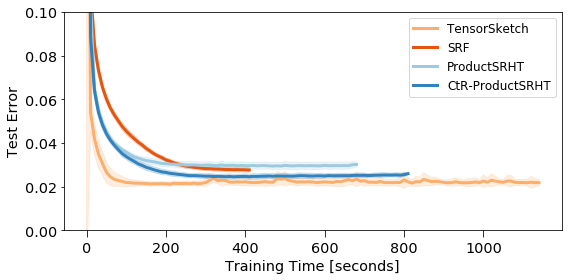

In [6]:
# P100 without cache, cuda 10.2, pytorch 1.1, ard
dirs_p6_10k_tune = [
    ('TensorSketch', colors[4], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_countsketch_scatter_deg_6_comprealFalse_p100_nocache_ard_lr_0.001_epochs_250'),
    ('SRF', colors[5], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srf_deg_6_comprealFalse_p100_nocache_ard_lr_0.001_epochs_250'),
    ('ProductSRHT', colors[6], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_6_comprealFalse_p100_nocache_ard_lr_0.001_epochs_250'),
    ('CtR-ProductSRHT', colors[7], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_6_comprealTrue_p100_nocache_ard_lr_0.001_epochs_250')
]

plot_dirs(dirs_p6_10k_tune, savepath='')

TensorSketch [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250] [0.42506029 0.085112   0.05869804 0.04830625 0.042306   0.03843673
 0.03563265 0.03342    0.03174808 0.0306     0.029808   0.02923469
 0.028512   0.028178   0.027852   0.027578   0.02732245 0.02719
 0.027068   0.0270125  0.026826   0.026842   0.026752   0.02676122
 0.02678571 0.02556667]
SRF [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260] [0.37222059 0.10396242 0.07816309 0.06639387 0.05898591 0.05428269
 0.05037315 0.04759371 0.04508182 0.04318562 0.04147613 0.04005714
 0.03877436 0.03747351 0.03616392 0.03502418 0.03398831 0.03309618
 0.03223046 0.03148924 0.03084777 0.03039013 0.02999671 0.02968923
 0.030252   0.03038421 0.03017059]
ProductSRHT [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280,

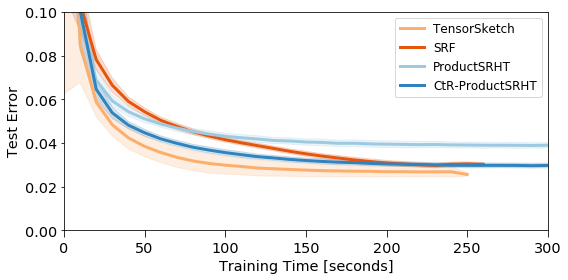

In [74]:
dirs_p7_10k_tune = [
    ('TensorSketch', colors[4], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_countsketch_scatter_deg_7_comprealFalse_2_lr_0.001_epochs_50'),
    ('SRF', colors[5], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srf_deg_7_comprealFalse_2_lr_0.001_epochs_150'),
    ('ProductSRHT', colors[6], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_7_comprealFalse_2_lr_0.001_epochs_150'),
    ('CtR-ProductSRHT', colors[7], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_7_comprealTrue_2_lr_0.001_epochs_150')
]

plot_dirs(dirs_p7_10k_tune, savepath='')

In [27]:
dirs_p7_10k_tune = [
    ('TensorSketch', colors[4], '../tensorboard_logs/mnist_tune/d10k/p7/ts'),
    ('SRF', colors[5], '../tensorboard_logs/mnist_tune/d10k/p7/srf'),
    ('ProductSRHT', colors[6], '../tensorboard_logs/mnist_tune/d10k/p7/srht'),
    ('CtR-ProductSRHT', colors[7], '../tensorboard_logs/mnist_tune/d10k/p7/srht_comp_real')
]

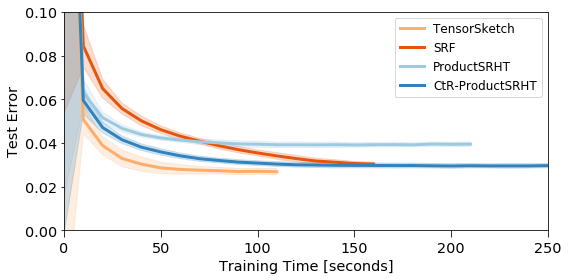

In [28]:
plot_dirs(dirs_p7_10k_tune, savepath='')

In [101]:
dirs_p6_10k_tune = [
    ('SRF', colors[5], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srf_deg_6_comprealFalse_p100_cache2_lr_0.001_epochs_250'),
    ('TensorSketch', colors[4], '../tensorboard_logs/mnist_tune/d10k/p6/ts'),
    ('ProductSRHT', colors[6], '../tensorboard_logs/mnist_tune/d10k/p6/srht'),
    ('CtR-ProductSRHT', colors[7], '../tensorboard_logs/mnist_tune/d10k/p6/srht_comp_real')
]

SRF [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240] [0.30246818 0.08632    0.06759474 0.058845   0.052685   0.04839524
 0.0449     0.04230952 0.04001    0.03844737 0.036635   0.035085
 0.033325   0.03221429 0.0316     0.03093    0.030385   0.03012
 0.029775   0.0297619  0.029805   0.02961    0.0296     0.029555
 0.02957059]
TensorSketch [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260] [0.50669166 0.0728125  0.05572083 0.0483125  0.04367917 0.04055417
 0.03813333 0.03626667 0.03575    0.03353    0.03297895 0.03178696
 0.0314     0.03067083 0.0299875  0.02941667 0.02916522 0.02864167
 0.02846364 0.02821905 0.02705    0.02741818 0.02753182 0.02712083
 0.02697917 0.02698261 0.0238    ]
ProductSRHT [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150] [0.24701136 0.04872521 0.04128254 0.03728862 0.03494797 0.03338618
 0.03230325 0.031

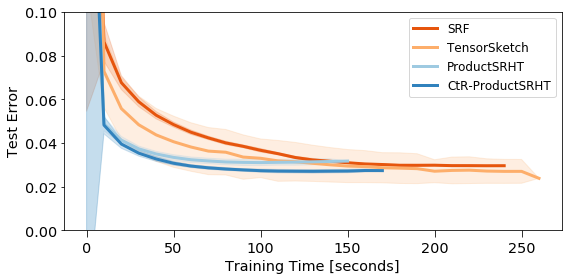

In [102]:
plot_dirs(dirs_p6_10k_tune, savepath='')

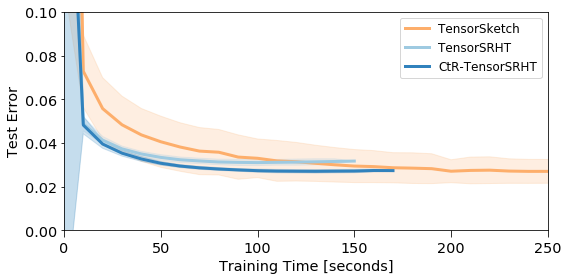

In [100]:
plot_dirs(dirs_p6_10k_tune, savepath='../figures/vi_gp_convergence.pdf')

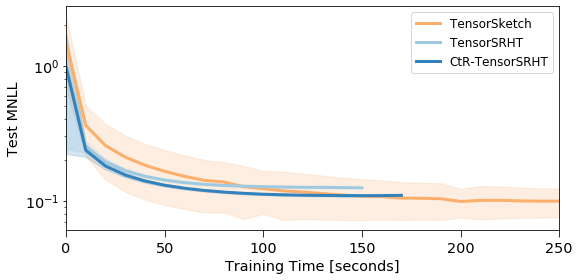

In [118]:
plot_dirs(dirs_p6_10k_tune, savepath='../figures/vi_gp_convergence_train.pdf')

In [103]:
dirs_p6_10k = [
    ('SRF', colors[5], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srf_deg_6_comprealFalse_p100_cache2_lr_0.001_epochs_250'),
    ('TensorSketch', colors[4], '../tensorboard_logs/mnist/d10k/p6/ts'),
    ('ProductSRHT', colors[6], '../tensorboard_logs/mnist/d10k/p6/srht'),
    ('CtR-ProductSRHT', colors[7], '../tensorboard_logs/mnist/d10k/p6/srht_comp_real')
]

SRF [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240] [0.30246818 0.08632    0.06759474 0.058845   0.052685   0.04839524
 0.0449     0.04230952 0.04001    0.03844737 0.036635   0.035085
 0.033325   0.03221429 0.0316     0.03093    0.030385   0.03012
 0.029775   0.0297619  0.029805   0.02961    0.0296     0.029555
 0.02957059]
TensorSketch [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350] [0.507186   0.083008   0.065918   0.056436   0.05138571 0.04687879
 0.04412647 0.04195263 0.03988485 0.038      0.03688919 0.03548824
 0.03411053 0.03337778 0.03203    0.03203415 0.03108387 0.03007027
 0.0301     0.02920303 0.02923077 0.02832424 0.0279027  0.02813143
 0.02712222 0.02733889 0.02634545 0.02716857 0.02625    0.0265625
 0.02602368 0.02622857 0.0254     0.02574118 0.025856   0.0246    ]
ProductSRHT [0, 10, 20

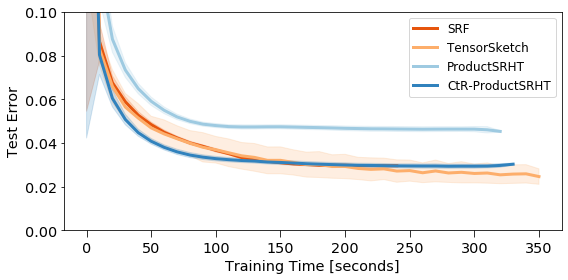

In [104]:
plot_dirs(dirs_p6_10k, savepath='')